In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your CSV (adjust path if needed)
df = pd.read_csv('/Users/tahmidalkawsarchowdhury/Documents/creative-ai-art-generators-research/diffusiondb_sample.csv')
df.head()


,prompt,seed,step,cfg,sampler,width,height,user_name,timestamp,image_nsfw,prompt_nsfw
0,woodcut of illustrated letters gilded with ani...,3838963998,50,7.0,k_lms,512,512,fec3b29e38f24876b79948e7ddba7697f9a04f1b36b436...,2022-08-14 00:45:00+00:00,0.071060,0.016973
1,"3 d toy aztec gods as funco toy, octane 8 k re...",1777661601,50,7.0,k_lms,512,512,1ee0a604397be663e16f0932f4b26174c935eefef7a314...,2022-08-14 00:45:00+00:00,0.131095,0.000912
2,spanish golden oriole flying in avila green ha...,1478757006,150,10.0,k_lms,512,512,6c5479ccdcb1e88bf4b3bf89276420769fba5f178c7a19...,2022-08-14 00:46:00+00:00,0.063575,0.000482
3,spanish golden oriole flying in avila path bet...,1471069805,150,10.0,k_lms,512,512,6c5479ccdcb1e88bf4b3bf89276420769fba5f178c7a19...,2022-08-14 00:47:00+00:00,0.127788,0.000437
4,"a woman with an oval shaped face, angular jaw,...",1800961528,50,7.0,k_lms,512,512,4596a7e724da0b2a96f59ac5b3fb4a1f05b9234fbe8638...,2022-08-14 00:47:00+00:00,0.156679,0.019354


In [5]:
df.describe(include='all')

,prompt,seed,step,cfg,sampler,width,height,user_name,timestamp,image_nsfw,prompt_nsfw
count,1000,1.000000e+03,1000.000000,1000.000000,1000,1000.000000,1000.000000,1000,1000,1000.000000,1000.000000
unique,917,NaN,NaN,NaN,3,NaN,NaN,173,343,NaN,NaN
top,"doom eternal, mutant, tubes fused with the bod...",NaN,NaN,NaN,k_lms,NaN,NaN,6c5479ccdcb1e88bf4b3bf89276420769fba5f178c7a19...,2022-08-13 22:46:00+00:00,NaN,NaN
freq,10,NaN,NaN,NaN,993,NaN,NaN,72,7,NaN,NaN
mean,NaN,2.172206e+09,79.319000,8.419700,NaN,579.648000,563.200000,NaN,NaN,0.160516,0.043606
std,NaN,1.189036e+09,44.005474,3.014878,NaN,188.734334,123.234617,NaN,NaN,0.191112,0.135221
min,NaN,5.179714e+06,3.000000,1.000000,NaN,256.000000,192.000000,NaN,NaN,0.020818,0.000178
25%,NaN,1.195949e+09,50.000000,7.000000,NaN,512.000000,512.000000,NaN,NaN,0.061186,0.000779
50%,NaN,2.192464e+09,50.000000,7.000000,NaN,512.000000,512.000000,NaN,NaN,0.092761,0.001901
75%,NaN,3.162034e+09,150.000000,9.000000,NaN,512.000000,512.000000,NaN,NaN,0.150412,0.011045


In [6]:
df['sampler'].value_counts()


sampler
k_lms                993
ddim                   6
k_euler_ancestral      1
Name: count, dtype: int64

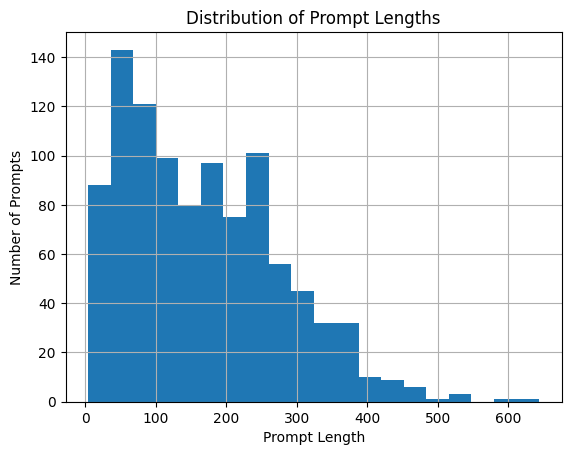

In [7]:
import matplotlib.pyplot as plt

df['prompt_length'] = df['prompt'].apply(len)
df['prompt_length'].hist(bins=20)
plt.xlabel('Prompt Length')
plt.ylabel('Number of Prompts')
plt.title('Distribution of Prompt Lengths')
plt.show()

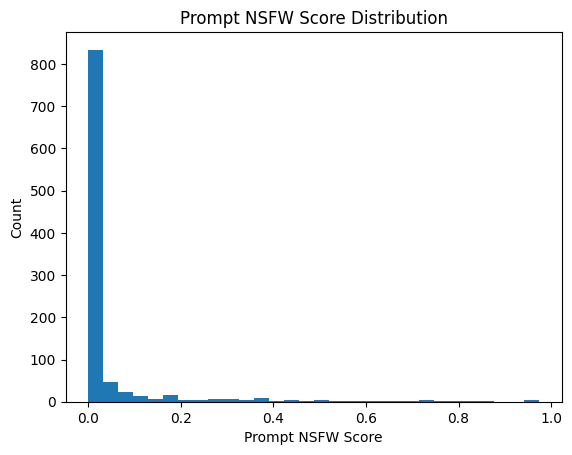

In [8]:
plt.hist(df['prompt_nsfw'], bins=30)
plt.xlabel('Prompt NSFW Score')
plt.ylabel('Count')
plt.title('Prompt NSFW Score Distribution')
plt.show()


In [9]:
df.sort_values('prompt_nsfw', ascending=False)[['prompt', 'prompt_nsfw']].head(10)


,prompt,prompt_nsfw
827,painting of jesus christ holding a two balls,0.974093
834,painting of jesus holding giving two balls fro...,0.968156
821,vince gilligan delivering two balls,0.961641
832,painting of jesus christ delivering two balls ...,0.960528
819,vince gilligan holding giving two balls to tho...,0.948548
178,closeup of a cow shit in the middle of the pat...,0.865662
403,donald trump as muppet in jail,0.856806
394,"undead mutant, unreal engine",0.843297
391,"undead mutant, unreal engine",0.843297
183,closeup of a cow shit in the middle of the pat...,0.806965


In [10]:
print("Longest prompts:")
print(df.loc[df['prompt_length'].idxmax()]['prompt'])
print("\nShortest prompts:")
print(df.loc[df['prompt_length'].idxmin()]['prompt'])

Longest prompts:
photo of full - body rococo and cyberpunk delicate neon crystalline sculpture of ( ( handsome muscular onyx albino marble prince nick jonas robot ) ) as an mint iridescent humanoid deity wearing ( ( pink plastic hooded cloak ) ) ( holding an onyx skull ) in a onyx chinese dungeon, reclining, glowing yellow face, crown of violet lasers, large white diamonds, swirling peach silk fabric, futuristic elements, oozing glowing liquid, full - length view. space robots. intricate artwork by caravaggio. trending on artstation, octane render, cinematic lighting from the right, hyper realism, photorealistic, octane render, 8 k, depth of field, 3 d 

Shortest prompts:
🌠🚀🌈 


In [11]:
df['prompt'].value_counts().head(10)

prompt
doom eternal, mutant, tubes fused with the body, front view, painted by stanley lau, painted by greg rutkowski, painted by stanley, artgerm, masterpiece, digital art, trending on arts                                                                                                                                                                                                                                                                              10
a painting of a castle in the middle of a snowy mountain, a detailed matte painting by andreas rocha and greg rutkowski, featured on artstation, fantasy art, matte drawing, matte painting, artstation hq                                                                                                                                                                                                                                                            9
zombie from doom eternal, front view, painted by stanley lau, painted by greg rut

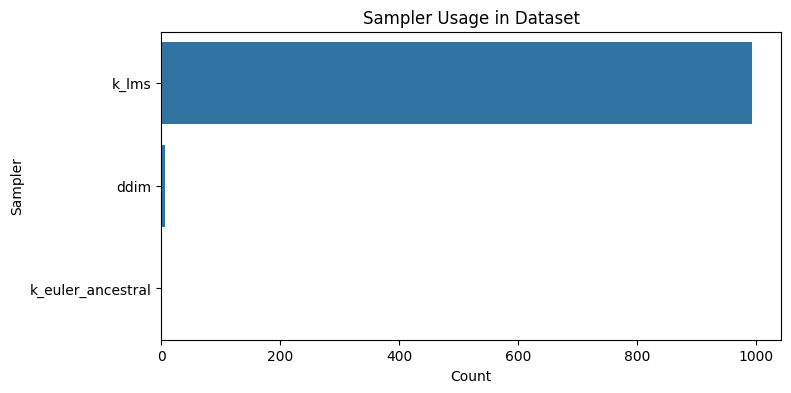

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.countplot(y=df['sampler'], order=df['sampler'].value_counts().index)
plt.title('Sampler Usage in Dataset')
plt.xlabel('Count')
plt.ylabel('Sampler')
plt.show()

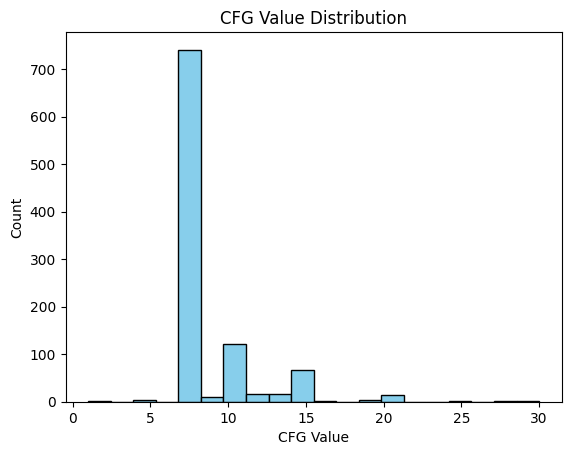

In [13]:
plt.hist(df['cfg'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('CFG Value')
plt.ylabel('Count')
plt.title('CFG Value Distribution')
plt.show()

In [14]:
### Summary of Exploratory Analysis

We explored 1,000 real prompt-image metadata records from the DiffusionDB dataset. 
Key findings include:
- The dataset features a wide range of prompt lengths and creativity.
- Some prompts are repeated often, while others are unique.
- A few samplers and CFG values are particularly common.
- NSFW scores vary, but most prompts are safe for work.

This analysis provides a solid foundation for benchmarking generative AI art APIs and further research.

SyntaxError: invalid syntax (3450556827.py, line 3)